**Environment Setup and Dependency Loading**

We begin by importing the necessary libraries for data handling, deep learning, and visualization. This includes PyTorch for model building, Scikit-Learn for performance evaluation, and KaggleHub to interface directly with the dataset

In [1]:
# -------------------------
# Import libraries
# -------------------------
import kagglehub
import pandas as pd
from PIL import Image as PILImage
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

**Dataset Acquisition**

In this step, we use the kagglehub library to download the "AI Art vs Human Art" dataset directly to our environment. Once the download is complete, we print the local file path and inspect the top-level directory structure to ensure all files have been retrieved correctly before proceeding to data processing.

In [2]:
# -------------------------
# Download dataset
# -------------------------
print("Downloading dataset")
path = kagglehub.dataset_download("hassnainzaidi/ai-art-vs-human-art")

print("Path to dataset files:", path)

print("\n" + "="*50)
print("Dataset downloaded to:", path)

print("\nTop-level folders")
print(os.listdir(path))

Path to dataset files: /kaggle/input/ai-art-vs-human-art

Dataset downloaded to: /kaggle/input/ai-art-vs-human-art

Top-level folders
['Art']


**Directory Mapping and Path Verification**

Before loading the images, we need to confirm the exact internal structure of the dataset. This script searches through the downloaded folders to locate the specific directories for "AI" and "Human" art. 

In [3]:
# -------------------------
# Dataset Directory
# -------------------------
base_art_path = os.path.join(path, 'Art')

if os.path.exists(base_art_path):
    print(f"Contents of {base_art_path}:")
    print(os.listdir(base_art_path))
else:
    print(f"Error: {base_art_path} does not exist.")
    print(f"Checking {path} again:")
    print(os.listdir(path))

# This helper function will find the folders regardless of where they are
for root, dirs, files in os.walk(path):
    if 'AI' in dirs or 'Human' in dirs:
        print(f"\nFound them! The actual paths are:")
        print(f"Root: {root}")
        print(f"Subdirectories: {dirs}")
        break

Contents of /kaggle/input/ai-art-vs-human-art/Art:
['RealArt', 'AiArtData']


**Exploratory Data Analysis and Visualization**

To understand the quality and characteristics of our data, we count the total number of images available for each class. We then use a helper function to randomly select and display samples from both the AI-generated and human-made categories. This visual check allows us to verify that the images are loading correctly and gives us a first look at the visual differences between the two classes.

Verified AI Images: 536
Verified Human Images: 434

--- AI Generated Art Samples ---


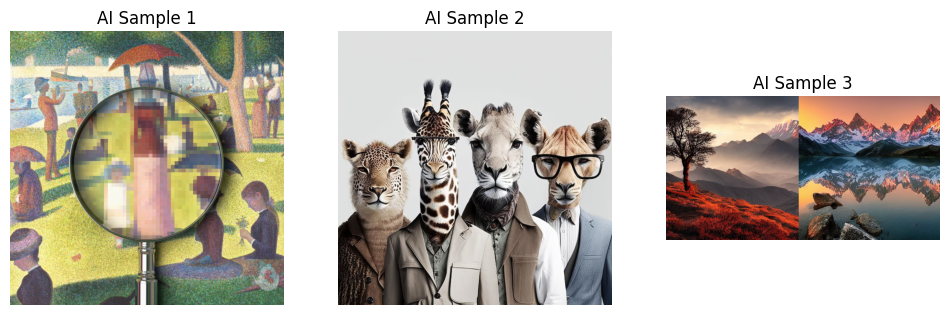


--- Human Generated Art Samples ---


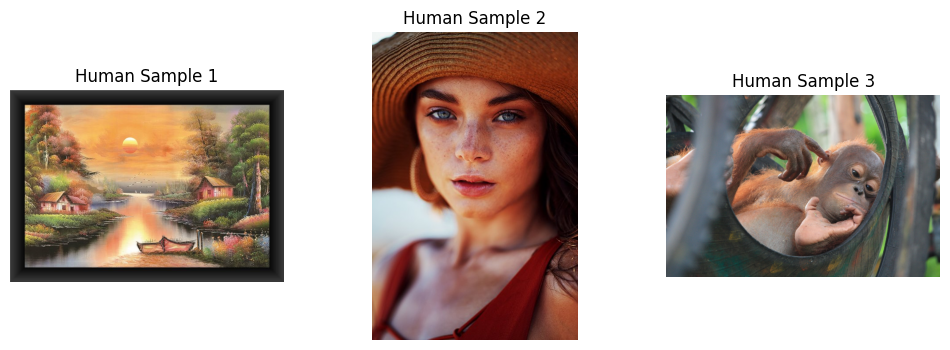

In [4]:
# -------------------------
# Dataset Visualization
# -------------------------
base_art_path = os.path.join(path, 'Art')
ai_path = os.path.join(base_art_path, 'AiArtData')
human_path = os.path.join(base_art_path, 'RealArt')

ai_images = [f for f in os.listdir(ai_path) if f.lower().endswith(('.png', '.jpg', 'jpeg'))]
human_images = [f for f in os.listdir(human_path) if f.lower().endswith(('.png', '.jpg', 'jpeg'))]

print(f"Verified AI Images: {len(ai_images)}")
print(f"Verified Human Images: {len(human_images)}")

def plot_samples(image_list, folder_path, title):
    plt.figure(figsize=(12, 4))
    samples = random.sample(image_list, 3)
    for i, img_name in enumerate(samples):
        plt.subplot(1, 3, i + 1)
        img = PILImage.open(os.path.join(folder_path, img_name))
        plt.imshow(img)
        plt.title(f"{title} Sample {i + 1}")
        plt.axis('off')
    plt.show()

print("\n--- AI Generated Art Samples ---")
plot_samples(ai_images, ai_path, "AI")

print("\n--- Human Generated Art Samples ---")
plot_samples(human_images, human_path, "Human")

**Model Configuration, Training, and Evaluation**

This final block contains the core logic of our project, starting with the definition of hyperparameters and image transformations like resizing and normalization. We utilize ResNet18, a lightweight yet powerful residual network, which is ideal for this dataset size as it avoids the overfitting common in deeper architectures.

The process includes a stratified split for training and validation, an Adam optimizer, and an Early Stopping mechanism to halt training once the validation loss stops improving. After training, we evaluate the model using a Confusion Matrix and a Classification Report to see how accurately the model distinguishes between AI and human creativity.

Using device: cuda
Classes: ['AiArtData', 'RealArt']
Training samples: 778
Validation samples: 195
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/25] Train Loss: 0.6080 | Train Acc: 0.6581 Val Loss: 0.4737 | Val Acc: 0.7128
Epoch [2/25] Train Loss: 0.4219 | Train Acc: 0.8406 Val Loss: 0.4030 | Val Acc: 0.8103
Epoch [3/25] Train Loss: 0.3205 | Train Acc: 0.8792 Val Loss: 0.3711 | Val Acc: 0.8308
Epoch [4/25] Train Loss: 0.2833 | Train Acc: 0.9075 Val Loss: 0.3592 | Val Acc: 0.8462
Epoch [5/25] Train Loss: 0.2189 | Train Acc: 0.9280 Val Loss: 0.3366 | Val Acc: 0.8410
Epoch [6/25] Train Loss: 0.1698 | Train Acc: 0.9653 Val Loss: 0.3244 | Val Acc: 0.8410
Epoch [7/25] Train Loss: 0.1367 | Train Acc: 0.9653 Val Loss: 0.3235 | Val Acc: 0.8256
Epoch [8/25] Train Loss: 0.1162 | Train Acc: 0.9807 Val Loss: 0.3182 | Val Acc: 0.8308
Epoch [9/25] Train Loss: 0.0945 | Train Acc: 0.9807 Val Loss: 0.3261 | Val Acc: 0.8308
Epoch [10/25] Train Loss: 0.0687 | Train Acc: 0.9897 Val Loss: 0.3307 | Val Acc: 0.8256
Epoch [11/25] Train Loss: 0.0795 | Train Acc: 0.9949 Val Loss: 0.3172 | Val Acc: 0.8256
Epoch [12/25] Train Loss: 0.0465 | Train 

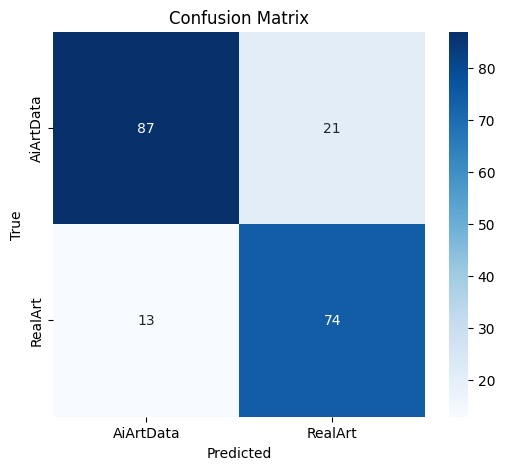

Classification Report:
              precision    recall  f1-score   support

   AiArtData       0.87      0.81      0.84       108
     RealArt       0.78      0.85      0.81        87

    accuracy                           0.83       195
   macro avg       0.82      0.83      0.82       195
weighted avg       0.83      0.83      0.83       195



In [5]:
# -------------------------
# CONFIG
# -------------------------
BATCH_SIZE = 64
EPOCHS = 25
PATIENCE = 5
LR = 3e-5
IMAGE_SIZE = 224

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# DATA PATH
# -------------------------
data_dir = base_art_path 

# -------------------------
# TRANSFORMS
# -------------------------
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -------------------------
# DATASET + SPLIT
# -------------------------
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transforms)
class_names = full_dataset.classes
targets = full_dataset.targets

train_idx, val_idx = train_test_split(
    np.arange(len(targets)),
    test_size=0.2,
    stratify=targets,
    random_state=42
)

train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(
    datasets.ImageFolder(root=data_dir, transform=val_transforms),
    val_idx
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Classes:", class_names)
print("Training samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))

# -------------------------
# MODEL
# -------------------------
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)

# -------------------------
# LOSS + OPTIMIZER
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=LR,
    weight_decay=1e-4
)


# -------------------------
# EARLY STOPPING SETUP
# -------------------------
best_val_loss = float("inf")
patience_counter = 0

# -------------------------
# TRAINING LOOP
# -------------------------
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # ---- VALIDATION ----
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    avg_val_loss = val_loss / len(val_loader)

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # ---- EARLY STOPPING ----
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered!")
            break

# -------------------------
# LOAD BEST MODEL
# -------------------------
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# -------------------------
# CONFUSION MATRIX
# -------------------------
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# CLASSIFICATION REPORT
# -------------------------
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
